In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = '2023-rainfall-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4770463%2F8082166%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240410%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240410T122159Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db76c38a6577adb8cfeb8624ef762ea9c2073dd2f4e14a623302781950ce5ad348215668d6875de8448978e092151c733fa18ddf7495dc53fb3efa449acfa7d89fc98c793f3f25c83325c85898666816ab1f47a02b798fe4e50a5b5410c717ab8ecb6130a459e89cdab62df7ebc2ff4772c22d72a971d861ca26cc9ee817f49c42db20b23d61c46333ef9d62045cc1ed935fe9af62a4e34b6b789952833af0ef740729849226e39fe717974444aa3834f250d9a477a0de22f752e77200fd6f2428882725b55788bbb7f569d2f28a41cd851f89c310f94759758fa0d221ce5e8783a157fe2e433aae247f11761a399120a2ead9ee59567b95bca7d5172817cc5d9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3235691 bytes downloaded
Downloaded and uncompressed: 2023-rainfall-data
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/../kaggle/input/2023-rainfall-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install metpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 8.2 MB/s eta 0:00:00


In [ ]:
pip install geopandas

In [ ]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.6 MB/s eta 0:00:00


In [ ]:
pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 36.9 MB/s eta 0:00:00


In [ ]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.0 MB/s eta 0:00:00


In [ ]:
!pip install shapely --no-binary shapely

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
# netCDF4 needs to be installed in your environment for this to work
!pip install netCDF4
import xarray as xr
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et
from netCDF4 import date2index
from datetime import datetime
from netCDF4 import Dataset

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [ ]:
filename = "../input/2023-rainfall-data/RF25_ind2023_rfp25.nc"
data = xr.open_dataset(filename)

In [ ]:
data

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 365)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized)  6-Feb-24
    Conventions:  CF-1.6

In [ ]:
# View first 5 latitude values
data["RAINFALL"]["LATITUDE"].values[:5]

array([6.5 , 6.75, 7.  , 7.25, 7.5 ])

In [ ]:
print("The min and max latitude values in the data is:",
      data["RAINFALL"]["LATITUDE"].values.min(),
      data["RAINFALL"]["LATITUDE"].values.max())
print("The min and max longitude values in the data is:",
      data["RAINFALL"]["LONGITUDE"].values.min(),
      data["RAINFALL"]["LONGITUDE"].values.max())

The min and max latitude values in the data is: 6.5 38.5
The min and max longitude values in the data is: 66.5 100.0


In [ ]:
# View first 5 and last. 5 time values - notice the span of
# dates range from 2011 to 2021
print("The earliest date in the data is:", data["RAINFALL"]["TIME"].values.min())
print("The latest date in the data is:", data["RAINFALL"]["TIME"].values.max())

The earliest date in the data is: 2023-01-01T00:00:00.000000000
The latest date in the data is: 2023-12-31T00:00:00.000000000


In [ ]:
data["RAINFALL"]["TIME"].values.shape

(365,)

In [ ]:
# Select a single x,y combination from the data
key=80
longitude = data["RAINFALL"]["LONGITUDE"].values[key]
latitude = data["RAINFALL"]["LATITUDE"].values[key]

print("Long, Lat values:", longitude, latitude)

Long, Lat values: 86.5 26.5


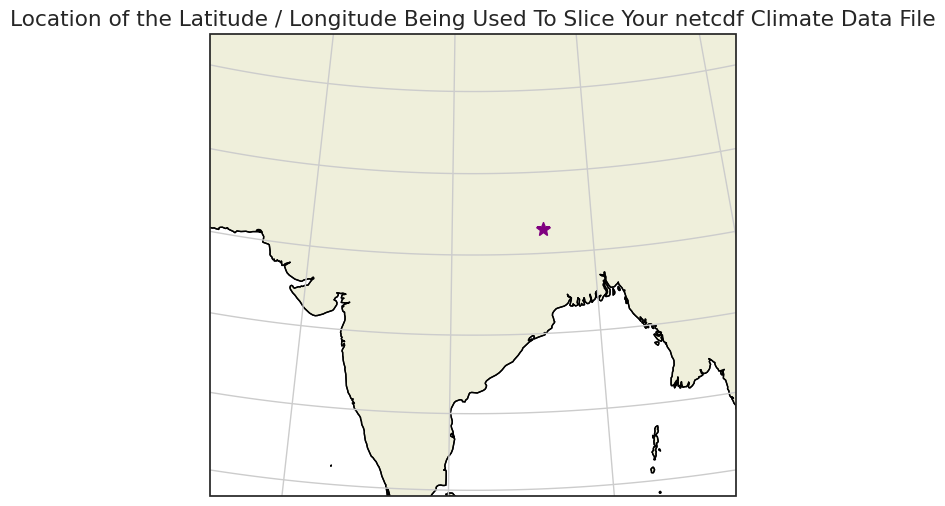

In [ ]:
# Set the spatial extent to cover India
extent = [65.7, 97.25, 8.4, 37.6]  # [lon_min, lon_max, lat_min, lat_max] for India
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# Create your figure and axis object
# Albers equal area is a common CRS used to make maps of large areas
f, ax = plt.subplots(figsize=(12, 6),
                     subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
ax.coastlines()
# Plot the selected location
ax.plot(longitude, latitude,
        '*',
        transform=ccrs.PlateCarree(),
        color="purple",
        markersize=10)
ax.set_extent(extent)
ax.set(title="Location of the Latitude / Longitude Being Used To Slice Your netcdf Climate Data File")

# Adds continent boundaries to the map
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.gridlines()
plt.show()


In [ ]:
start_date = "2023-01-01"
end_date = "2023-12-31"

# Ensure that "RAINFALL" is a correct DataArray in your dataset
one_year_data = data["RAINFALL"].sel(TIME=slice(start_date, end_date))

# Print the sliced data
print(one_year_data)


<xarray.DataArray 'RAINFALL' (TIME: 365, LATITUDE: 129, LONGITUDE: 135)>
[6356475 values with dtype=float64]
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-12-31
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2023_rfp25.grd


In [ ]:
one_year_data.shape

(365, 129, 135)

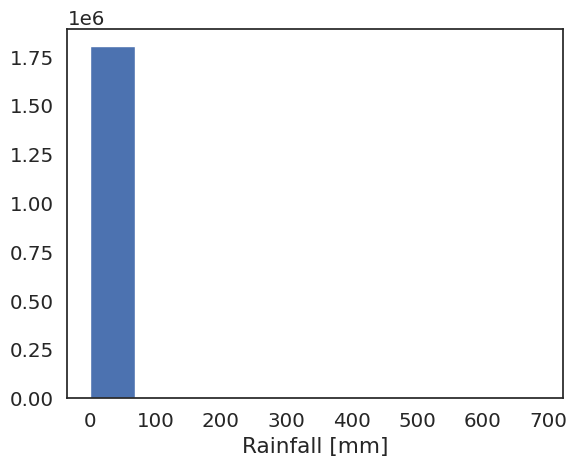

In [ ]:
one_year_data.plot()
plt.show()

In [ ]:
start_date = "2023-01-01"
end_date = "2023-12-31"
rr_2023_2023 = data["RAINFALL"].sel(TIME=slice(start_date, end_date), LATITUDE=slice(26.5,26.6),LONGITUDE=slice(86.5,86.6))
rr_2023_2023

<xarray.DataArray 'RAINFALL' (TIME: 365, LATITUDE: 1, LONGITUDE: 1)>
[365 values with dtype=float64]
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 86.5
  * LATITUDE   (LATITUDE) float64 26.5
  * TIME       (TIME) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-12-31
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2023_rfp25.grd

In [ ]:
rr_2023_2023.values

array([[[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e+00]],

       [[0.00000000e

In [ ]:
rr_2023_2023_df = rr_2023_2023.to_dataframe()
# View just the first 5 rows of the data
rr_2023_2023_df

,,,RAINFALL
TIME,LATITUDE,LONGITUDE,
2023-01-01,26.5,86.5,0.0
2023-01-02,26.5,86.5,0.0
2023-01-03,26.5,86.5,0.0
2023-01-04,26.5,86.5,0.0
2023-01-05,26.5,86.5,0.0
...,...,...,...
2023-12-27,26.5,86.5,0.0
2023-12-28,26.5,86.5,0.0
2023-12-29,26.5,86.5,0.0


In [ ]:
rr_2023_2023_df.describe()

,RAINFALL
count,365.000000
mean,3.173676
std,11.594755
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,112.540901


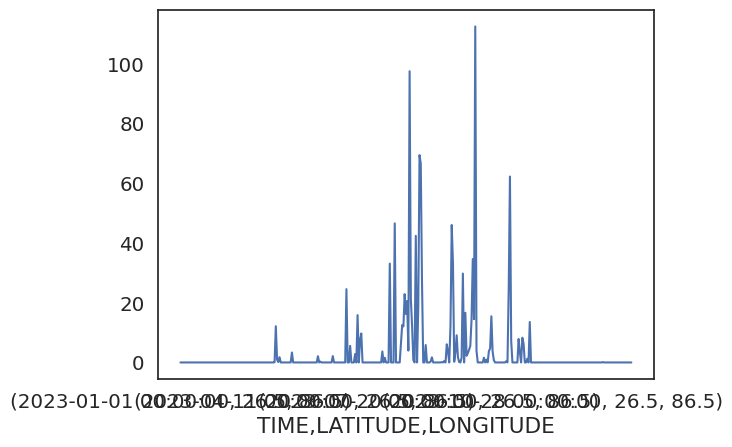

In [ ]:
rr_2023_2023_df['RAINFALL'].plot(kind='line')
plt.show()

In [ ]:
rr_2023_2023_df['RAINFALL'].shape

(365,)

In [ ]:
rr_2023_2023_df['rr_one_day'] = rr_2023_2023_df['RAINFALL'].shift(+1)
rr_2023_2023_df['rr_second_day'] = rr_2023_2023_df['RAINFALL'].shift(+2)
rr_2023_2023_df['rr_third_day'] = rr_2023_2023_df['RAINFALL'].shift(+3)
rr_2023_2023_df['rr_four_day'] = rr_2023_2023_df['RAINFALL'].shift(+4)
rr_2023_2023_df['rr_five_day'] = rr_2023_2023_df['RAINFALL'].shift(+5)
rr_2023_2023_df['rr_six_day'] = rr_2023_2023_df['RAINFALL'].shift(+6)
rr_2023_2023_df['rr_seven_day'] = rr_2023_2023_df['RAINFALL'].shift(+7)
rr_2023_2023_df

,,,RAINFALL,rr_one_day,rr_second_day,rr_third_day,rr_four_day,rr_five_day,rr_six_day,rr_seven_day
TIME,LATITUDE,LONGITUDE,,,,,,,,
2023-01-01,26.5,86.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,26.5,86.5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,26.5,86.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-01-04,26.5,86.5,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2023-01-05,26.5,86.5,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,26.5,86.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-28,26.5,86.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-29,26.5,86.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rr_2023_2023_df = rr_2023_2023_df.dropna()

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200, max_features=3, random_state=3 )

#Boosted Decision Tree
from sklearn.ensemble import GradientBoostingRegressor
GB_reg = GradientBoostingRegressor(n_estimators=100,max_features=3, random_state=1)

#XGB Regression Model
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.01)

In [ ]:
x1 ,x2, x3, x4, x5, x6, x7, y = rr_2023_2023_df['rr_one_day'], rr_2023_2023_df['rr_second_day'],rr_2023_2023_df['rr_third_day'], rr_2023_2023_df['rr_four_day'], rr_2023_2023_df['rr_five_day'], rr_2023_2023_df['rr_six_day'], rr_2023_2023_df['rr_seven_day'], rr_2023_2023_df['RAINFALL']
x1 ,x2, x3, x4, x5, x6, x7, y = np.array(x1), np.array(x2), np.array(x3),np.array(x4), np.array(x5), np.array(x6), np.array(x7),np.array(y)
x1 ,x2, x3, x4, x5, x6, x7, y= x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1),  x4.reshape(-1,1),  x5.reshape(-1,1),  x6.reshape(-1,1),  x7.reshape(-1,1),   y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3,x4,x5, x6, x7), axis=1)
print(final_x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
x_train, x_test, y_train, y_test = final_x[:-100], final_x[-100:], y[:-100], y[-100:]

In [ ]:
rf_model.fit(x_train, y_train)
GB_reg = GB_reg.fit(x_train, y_train)
xgb_reg = xgb_reg.fit(x_train, y_train)

<ipython-input-63-b0a3f701d9a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
training_subdata = final_x[260:280]
training_taget = y[260:280]

In [ ]:
training_subdata

array([[62.26980591, 24.46595955,  0.        ,  0.3945044 ,  0.        ,
         0.        ,  0.        ],
       [ 7.30404043, 62.26980591, 24.46595955,  0.        ,  0.3945044 ,
         0.        ,  0.        ],
       [ 0.        ,  7.30404043, 62.26980591, 24.46595955,  0.        ,
         0.3945044 ,  0.        ],
       [ 0.        ,  0.        ,  7.30404043, 62.26980591, 24.46595955,
         0.        ,  0.3945044 ],
       [ 0.        ,  0.        ,  0.        ,  7.30404043, 62.26980591,
        24.46595955,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  7.30404043,
        62.26980591, 24.46595955],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         7.30404043, 62.26980591],
       [ 7.86100578,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  7.30404043],
       [ 3.33726382,  7.86100578,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  3.3372

### **Random Forest Model**

In [ ]:
pred = rf_model.predict(x_test)

In [ ]:
#predictions on train dataset for checking the training performance
train_pred_rf = rf_model.predict(training_subdata)

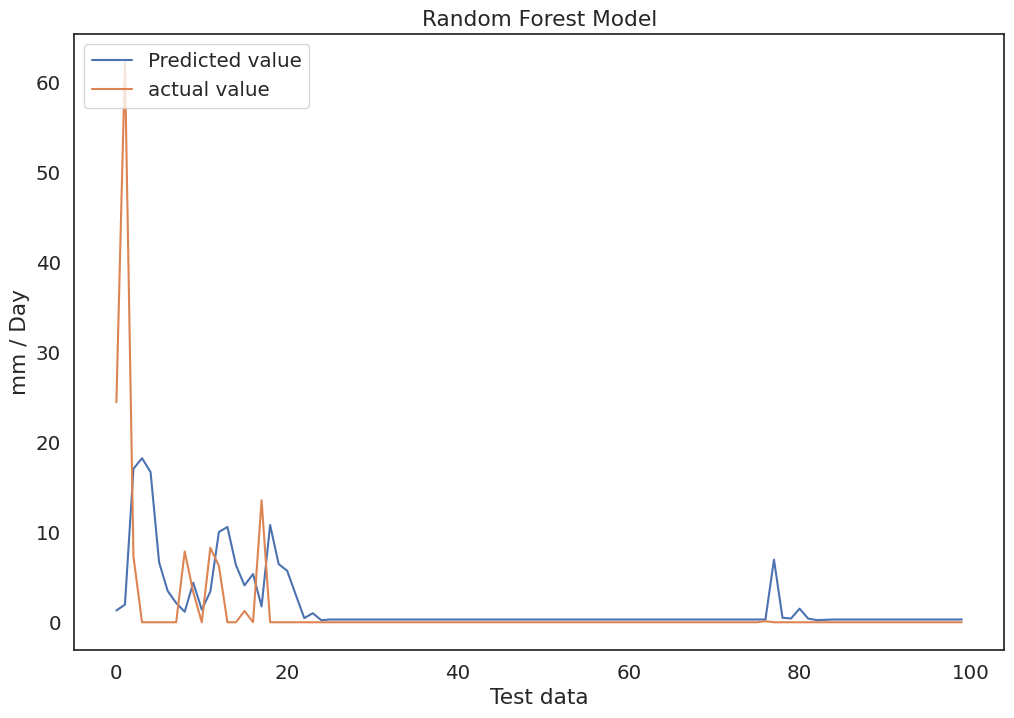

In [ ]:
pred = rf_model.predict(x_test)
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(pred, label='Predicted value')
plt.plot(y_test, label='actual value')
plt.legend(loc ="upper left")
plt.title('Random Forest Model')
plt.xlabel('Test data')
plt.ylabel('mm / Day')
plt.show()

### **Gradient Boosted Regression**

In [ ]:
#predictions of models
y_pred_GB_reg = GB_reg.predict(x_test)

In [ ]:
#predictions on train dataset for checking the training performance
train_pred_GB = GB_reg.predict(training_subdata)

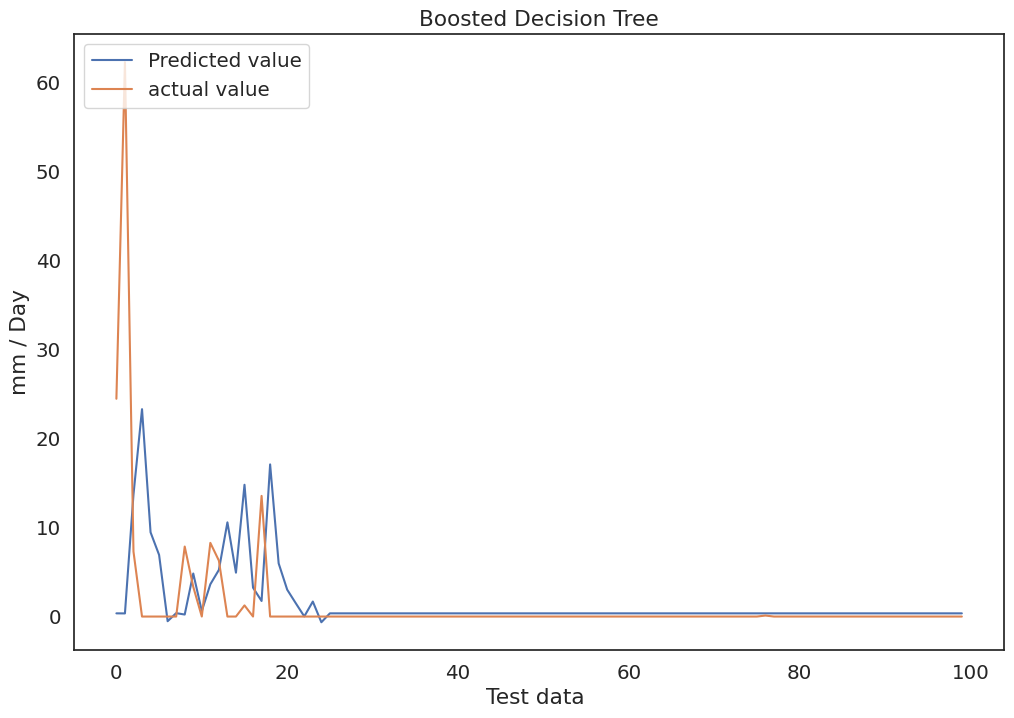

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(y_pred_GB_reg, label='Predicted value')
plt.plot(y_test, label='actual value')
plt.legend(loc ="upper left")
plt.title('Boosted Decision Tree')
plt.xlabel('Test data ')
plt.ylabel('mm / Day')
plt.show()

### **XGBoost Regression**

In [ ]:
#predictions of models
y_pred_XGB_reg= xgb_reg.predict(x_test)

In [ ]:
#predictions on train dataset for checking the training performance
train_pred_XGB = xgb_reg.predict(training_subdata)

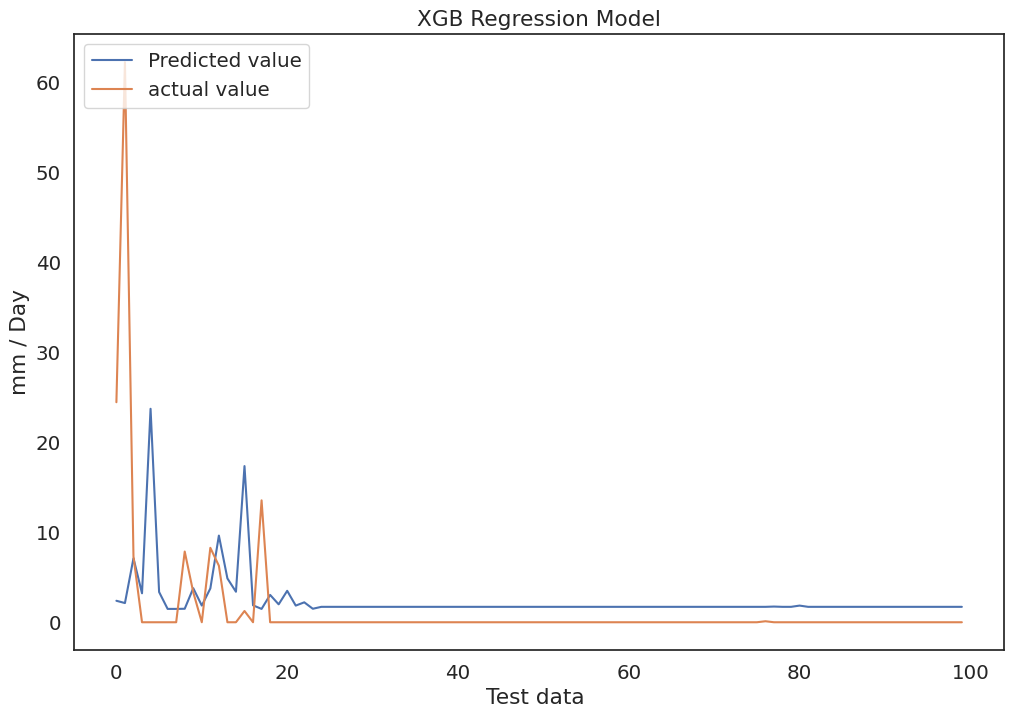

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(y_pred_XGB_reg, label='Predicted value')
plt.plot(y_test, label='actual value')
plt.legend(loc ="upper left")
plt.title('XGB Regression Model')
plt.xlabel('Test data ')
plt.ylabel('mm / Day')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse_drf = np.round(mean_squared_error(pred, y_test))
mse_gb = np.round(mean_squared_error(y_pred_GB_reg, y_test))
mse_xgb = np.round(mean_squared_error(y_pred_XGB_reg, y_test))
print('Mean squared error of decision random foreset:', mse_drf)
print('Mean squared error of Boosted decision tree regression:', mse_gb)
print('Mean squared error of XGB regression:', mse_gb)

Mean squared error of decision random foreset: 56.0
Mean squared error of Boosted decision tree regression: 60.0
Mean squared error of XGB regression: 60.0


In [ ]:
#Predicting the target values of the test set
# RMSE (Root Mean Square Error)
rmse_rf = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.3f'))
rmse_GB = float(format(np.sqrt(mean_squared_error(y_pred_GB_reg, y_test)), '.3f'))
rmse_XGB = float(format(np.sqrt(mean_squared_error(y_pred_XGB_reg, y_test)), '.3f'))
print("\nRMSE of random forest: ", rmse_rf)
print("\nRMSE of Boosted Regression: ", rmse_GB)
print("\nRMSE of XGBoosted Regression: ", rmse_XGB)


RMSE of random forest:  7.493

RMSE of Boosted Regression:  7.773

RMSE of XGBoosted Regression:  7.398


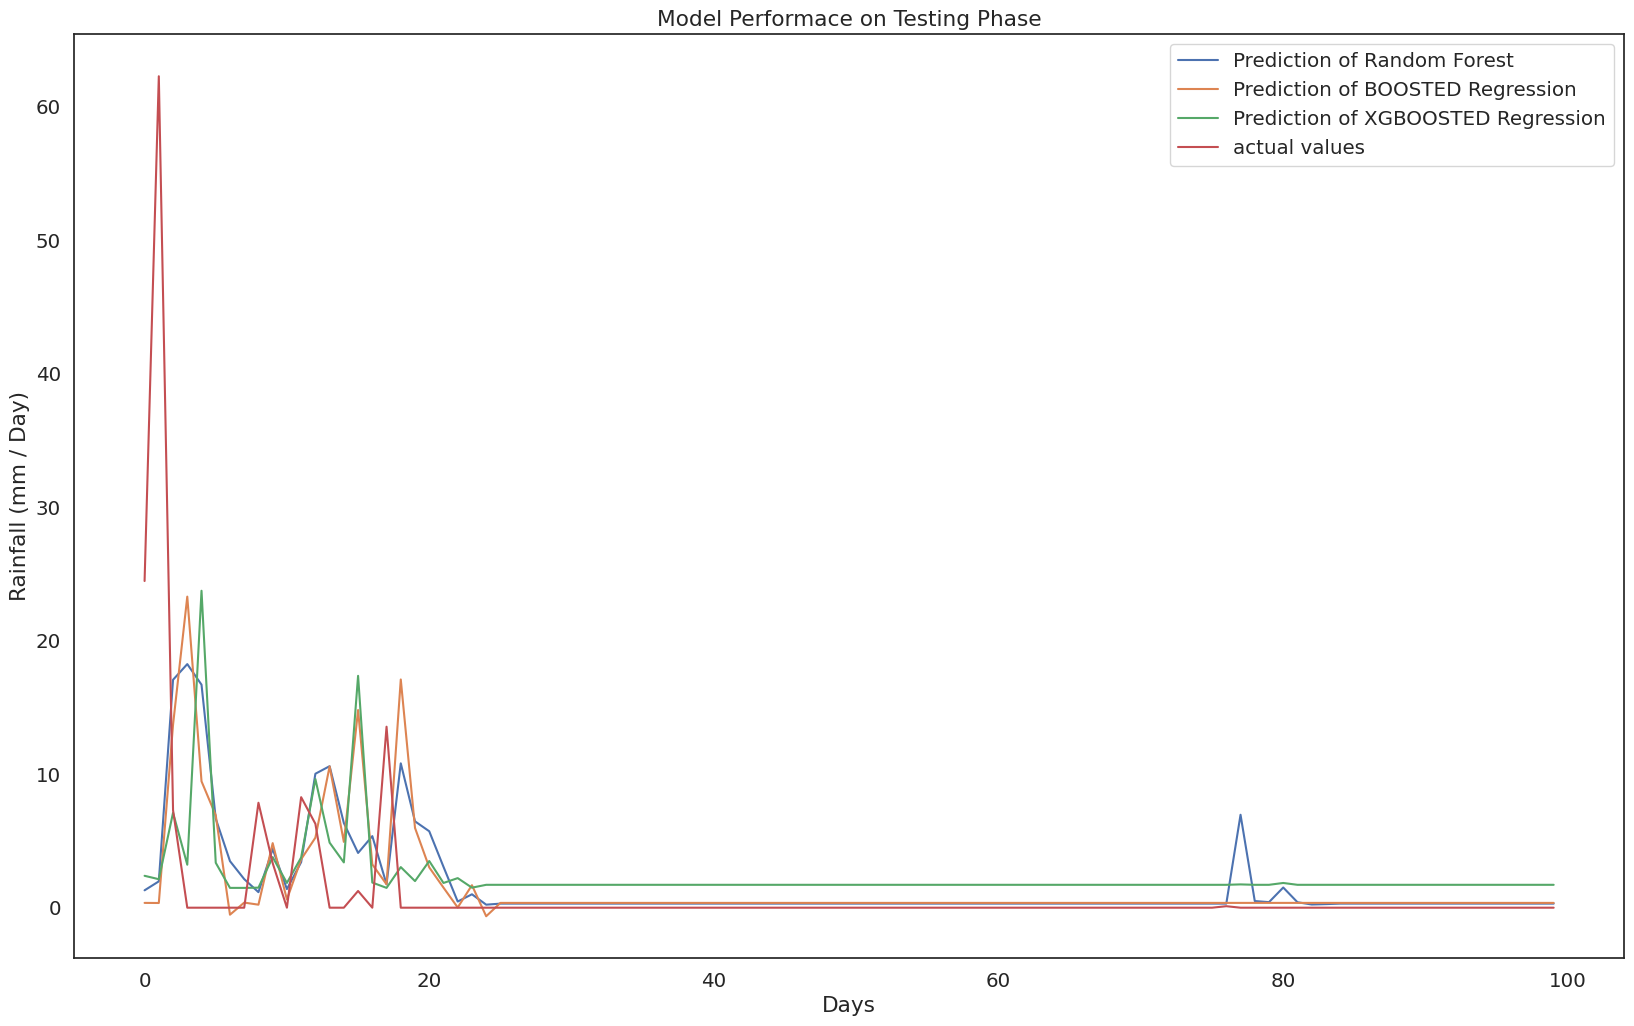

In [ ]:
plt.rcParams['figure.figsize'] = (20,12)
plt.plot(pred, label='Prediction of Random Forest')

plt.plot(y_pred_GB_reg, label='Prediction of BOOSTED Regression')
plt.plot(y_pred_XGB_reg, label='Prediction of XGBOOSTED Regression')
plt.plot(y_test, label='actual values')
plt.legend(loc ="upper right")
plt.title('Model Performace on Testing Phase')
plt.xlabel('Days')
plt.ylabel('Rainfall (mm / Day)')
plt.show()